In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tabular-playground-series-mar-2021/sample_submission.csv
/kaggle/input/tabular-playground-series-mar-2021/train.csv
/kaggle/input/tabular-playground-series-mar-2021/test.csv


In [66]:
# importing libraries

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('/kaggle/input/tabular-playground-series-mar-2021/train.csv')
test = pd.read_csv('/kaggle/input/tabular-playground-series-mar-2021/test.csv')

# Exploratory Data Analysis

Visualize the first rows of train and test

In [3]:
train.head()

,id,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,...,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,target
0,0,A,I,A,B,B,BI,A,S,Q,...,0.759439,0.795549,0.681917,0.621672,0.592184,0.791921,0.815254,0.965006,0.665915,0
1,1,A,I,A,A,E,BI,K,W,AD,...,0.386385,0.541366,0.388982,0.357778,0.600044,0.408701,0.399353,0.927406,0.493729,0
2,2,A,K,A,A,E,BI,A,E,BM,...,0.343255,0.616352,0.793687,0.552877,0.352113,0.388835,0.412303,0.292696,0.549452,0
3,3,A,K,A,C,E,BI,A,Y,AD,...,0.831147,0.807807,0.800032,0.619147,0.221789,0.897617,0.633669,0.760318,0.934242,0
4,4,A,I,G,B,E,BI,C,G,Q,...,0.338818,0.277308,0.610578,0.128291,0.578764,0.279167,0.351103,0.357084,0.328960,1


In [4]:
test.head()

,id,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,...,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10
0,5,A,F,A,A,F,BI,A,AH,AX,...,0.735690,0.578366,0.723154,0.228037,0.356227,0.551249,0.655693,0.598331,0.359987,0.947489
1,6,A,H,C,A,E,AB,I,F,N,...,0.313703,0.928885,0.516602,0.600169,0.795224,0.248987,0.654614,0.347944,0.565520,0.388580
2,8,A,N,C,A,F,AB,A,AH,BC,...,0.448201,0.424876,0.344729,0.242073,0.270632,0.746740,0.335590,0.341238,0.252289,0.411592
3,9,B,L,C,A,F,BI,A,E,AX,...,0.666092,0.598943,0.561971,0.806347,0.735983,0.538724,0.381566,0.481660,0.348514,0.325723
4,11,A,F,A,B,F,BI,A,AH,I,...,0.772229,0.479572,0.767745,0.252454,0.354810,0.178920,0.763479,0.562491,0.466261,0.585781


### Check for missing values

In [9]:
print('N. of missing values in train data:')
print('------')
print(train.isnull().sum())

N. of missing values in train data:
------
id        0
cat0      0
cat1      0
cat2      0
cat3      0
cat4      0
cat5      0
cat6      0
cat7      0
cat8      0
cat9      0
cat10     0
cat11     0
cat12     0
cat13     0
cat14     0
cat15     0
cat16     0
cat17     0
cat18     0
cont0     0
cont1     0
cont2     0
cont3     0
cont4     0
cont5     0
cont6     0
cont7     0
cont8     0
cont9     0
cont10    0
target    0
dtype: int64


In [10]:
print('N. of missing values in test data:')
print('------')
print(test.isnull().sum())

N. of missing values in test data:
------
id        0
cat0      0
cat1      0
cat2      0
cat3      0
cat4      0
cat5      0
cat6      0
cat7      0
cat8      0
cat9      0
cat10     0
cat11     0
cat12     0
cat13     0
cat14     0
cat15     0
cat16     0
cat17     0
cat18     0
cont0     0
cont1     0
cont2     0
cont3     0
cont4     0
cont5     0
cont6     0
cont7     0
cont8     0
cont9     0
cont10    0
dtype: int64


There are no missing value neither in train nor in test.

Check which type of data are in the dataset

In [14]:
train.dtypes

id          int64
cat0       object
cat1       object
cat2       object
cat3       object
cat4       object
cat5       object
cat6       object
cat7       object
cat8       object
cat9       object
cat10      object
cat11      object
cat12      object
cat13      object
cat14      object
cat15      object
cat16      object
cat17      object
cat18      object
cont0     float64
cont1     float64
cont2     float64
cont3     float64
cont4     float64
cont5     float64
cont6     float64
cont7     float64
cont8     float64
cont9     float64
cont10    float64
target      int64
dtype: object

We have both categorical and numerical columns, let's start by splitting them and analize the categoricals one

In [71]:
cat_columns = list(train.select_dtypes('object').columns)
num_columns = list(train.select_dtypes('float64').columns)

### Categorical Columns plotting

Check for cardinality of each categorical column

In [81]:
for i in cat_columns:
    plt.figure(figsize=(20,4))
    train[i].value_counts().plot(kind='bar')
    plt.title(i)
    plt.grid()
    plt.show()

SyntaxError: positional argument follows keyword argument (<ipython-input-81-5119b51344fd>, line 2)

<Figure size 432x288 with 0 Axes>

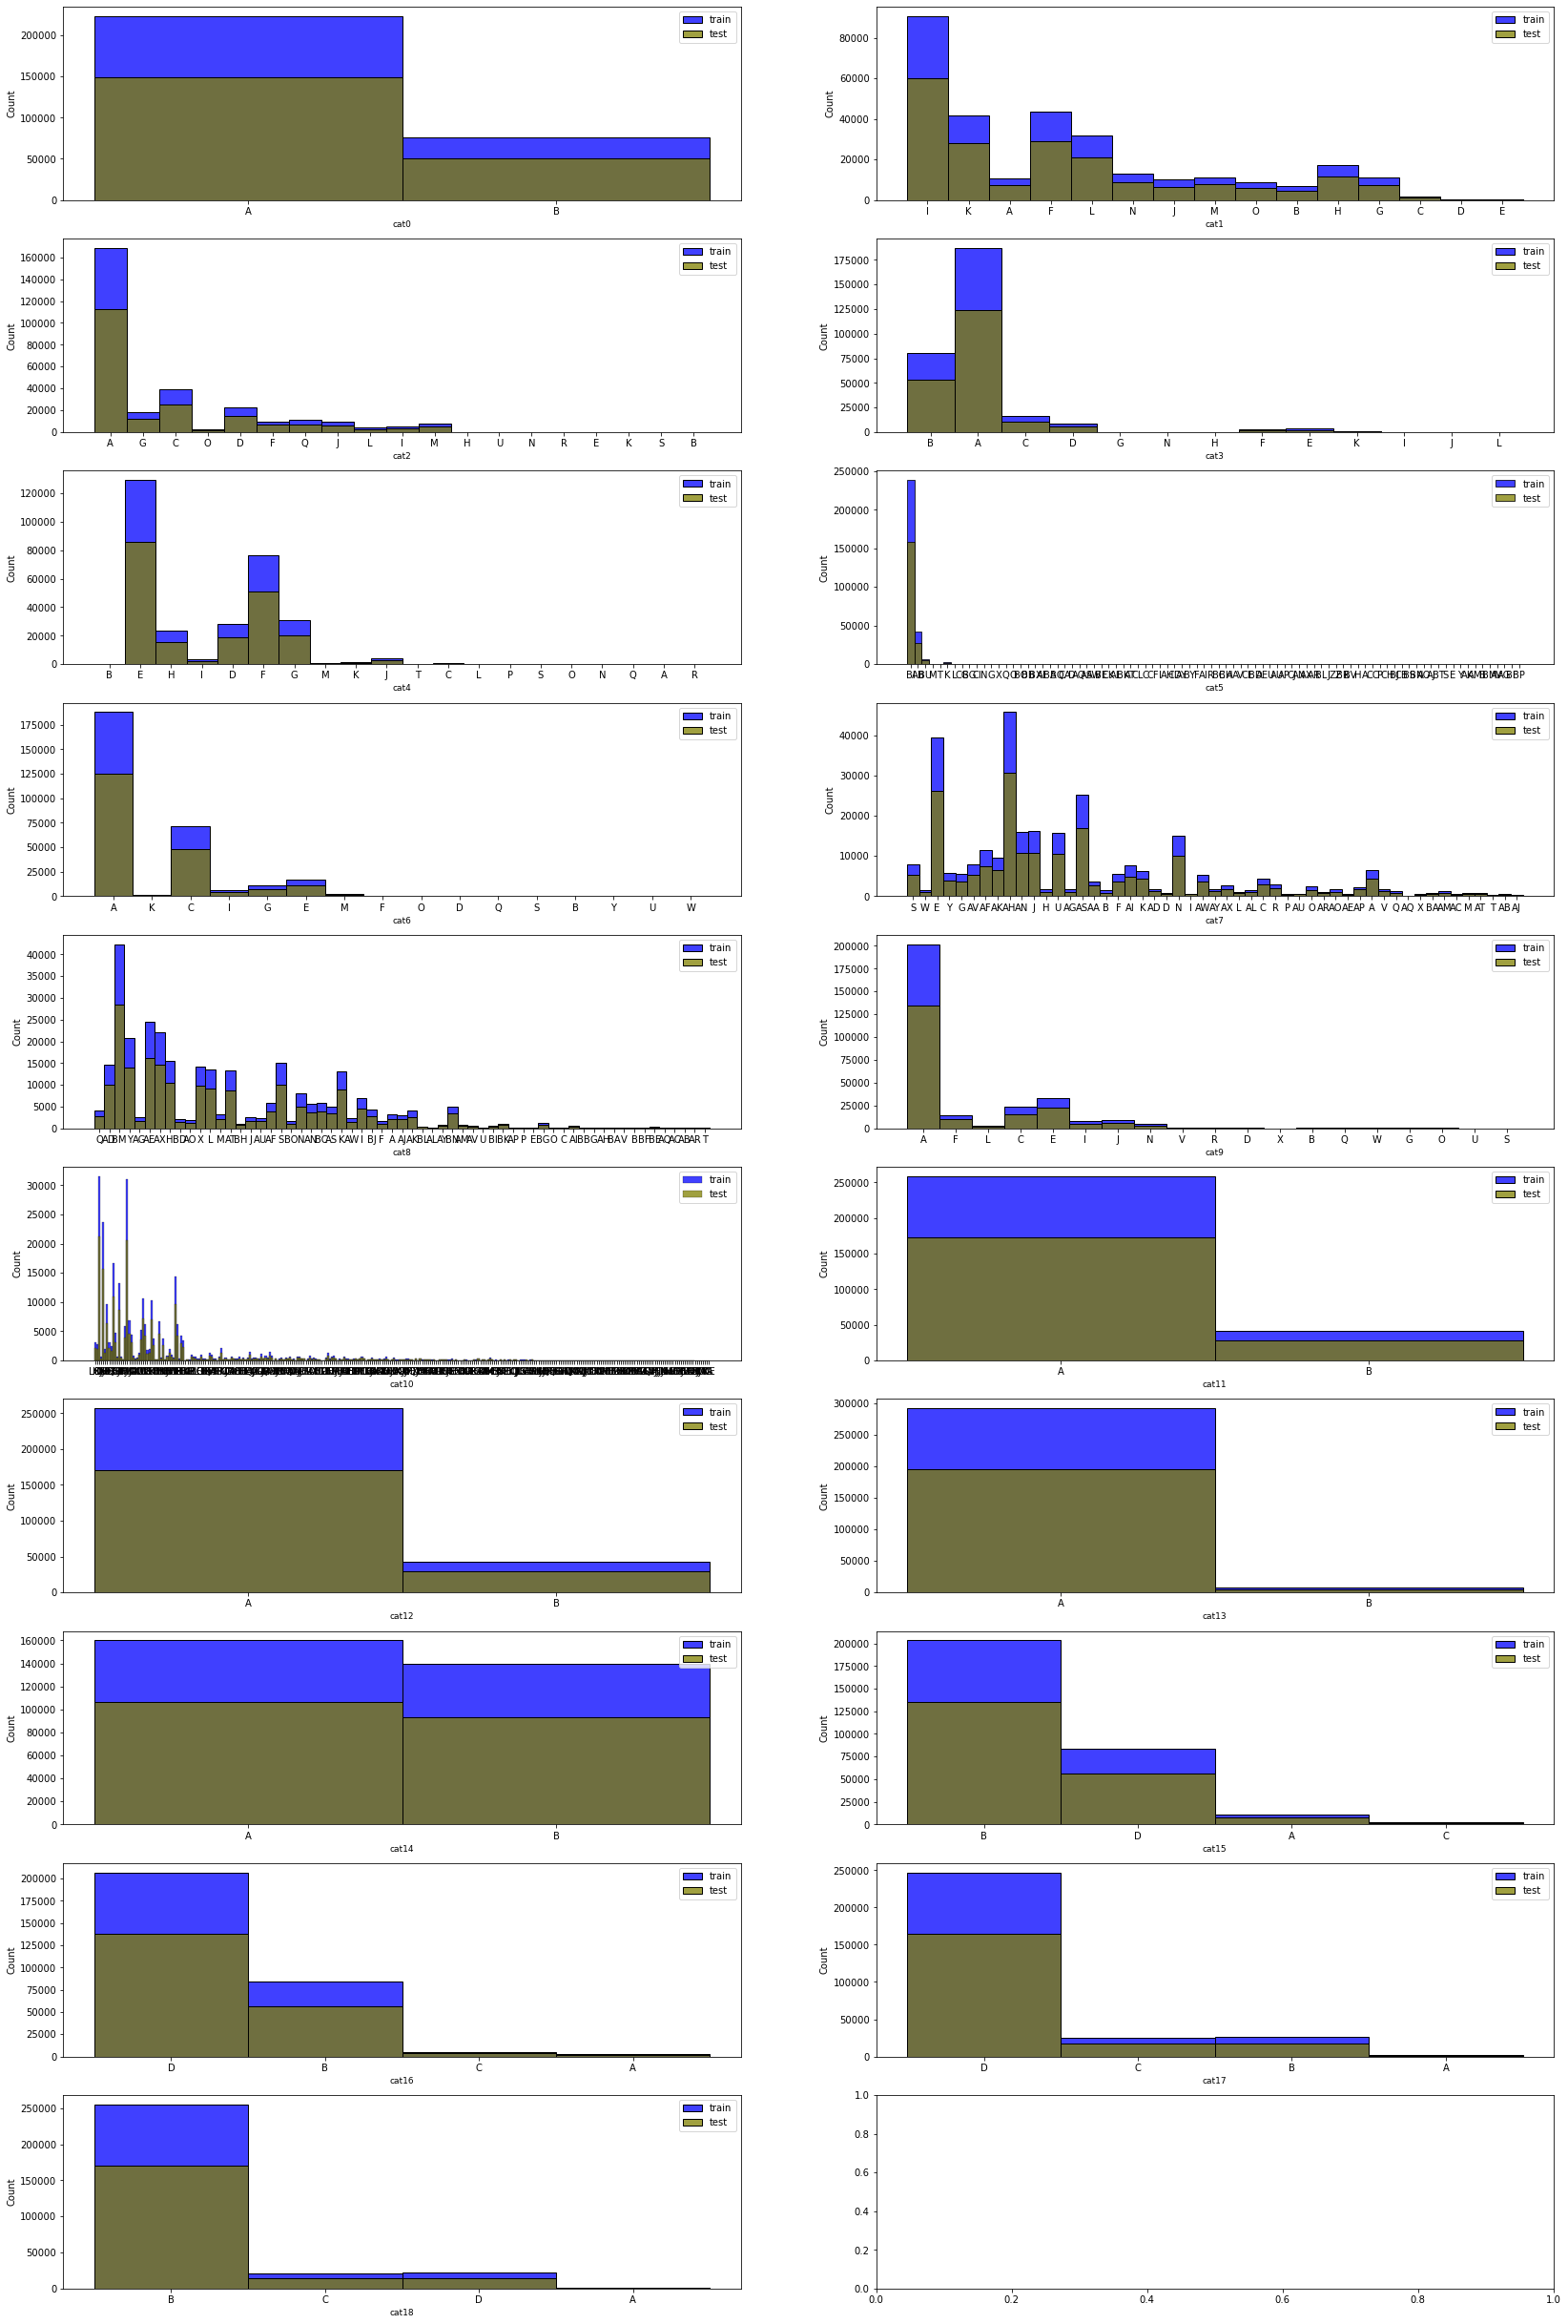

In [69]:
# Categorical features distribution (thanks to @hamzaghanmi for this cell)
i = 1
plt.figure()
fig, ax = plt.subplots(10, 2,figsize=(28, 44))
for feature in cat_columns:
    plt.subplot(10, 2,i)
    sns.histplot(train[feature],color="blue", label='train')
    sns.histplot(test[feature],color="olive", label='test')
    plt.xlabel(feature, fontsize=9); plt.legend()
    i += 1
plt.show()



### Numerical columns plotting

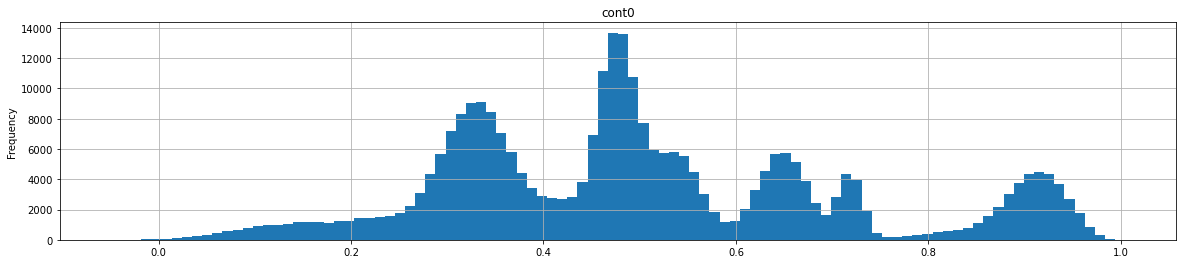

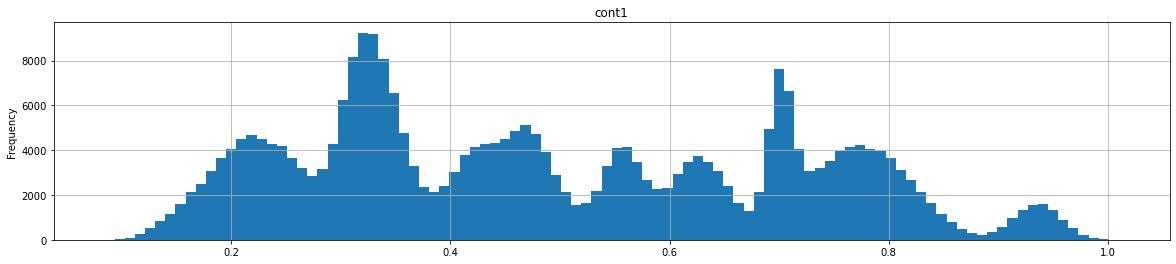

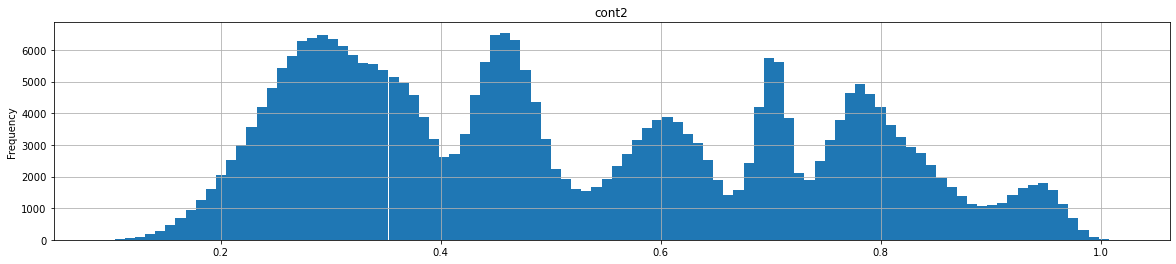

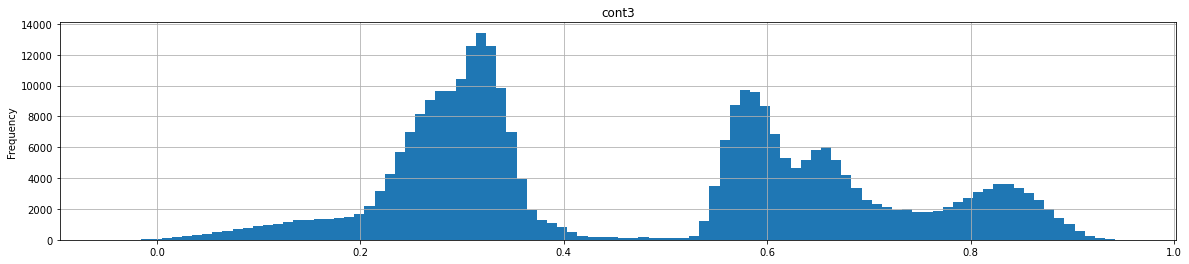

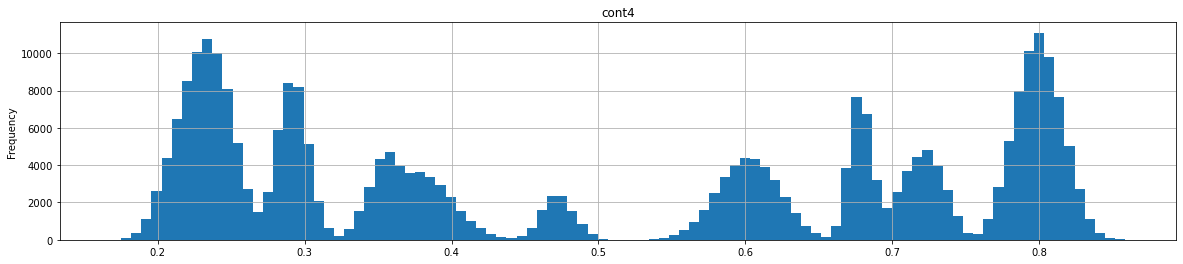

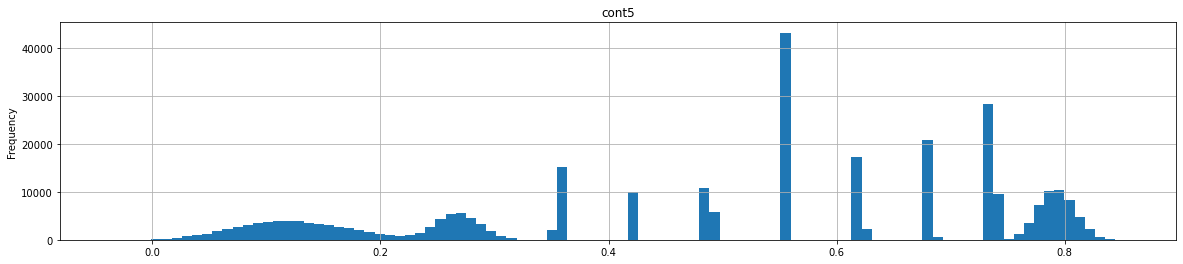

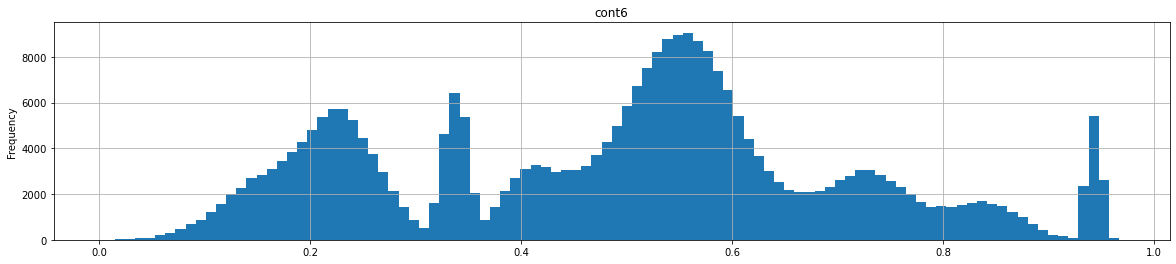

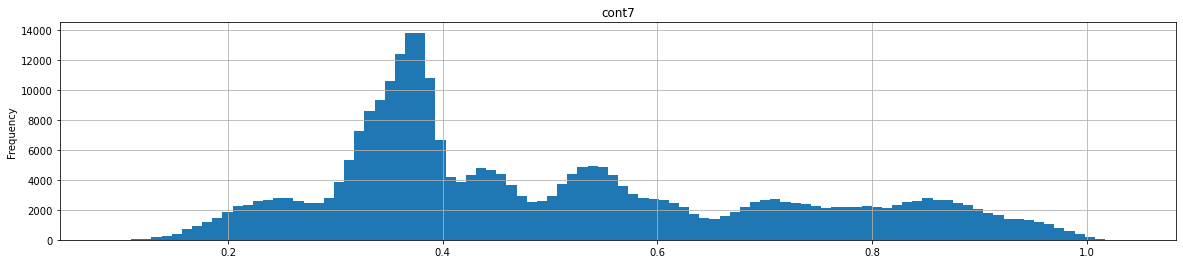

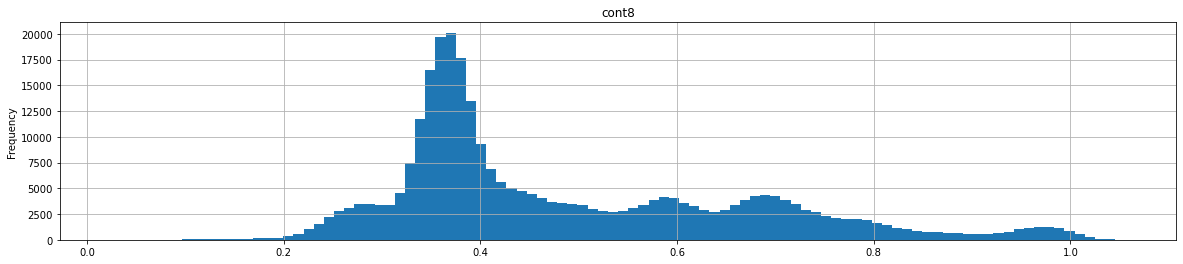

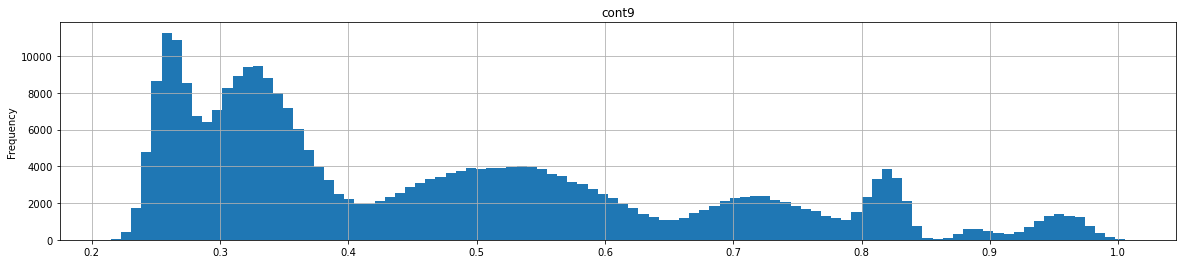

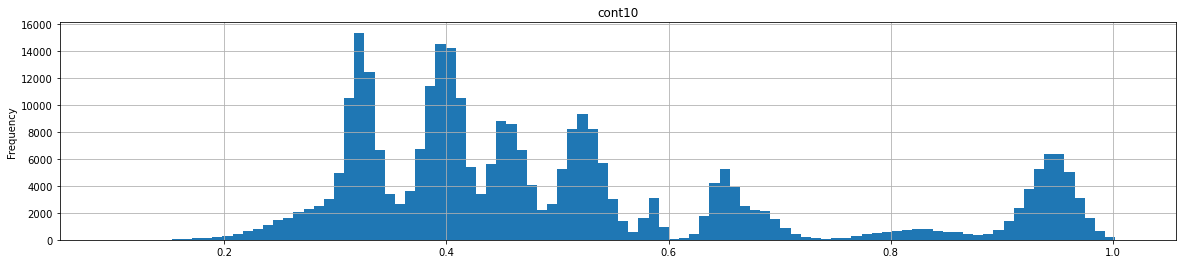

In [80]:
for i in num_columns:
    plt.figure(figsize=(20,4))
    train[i].plot(kind='hist', bins=100)
    plt.title(i)
    plt.grid()
    plt.show()

<Figure size 432x288 with 0 Axes>

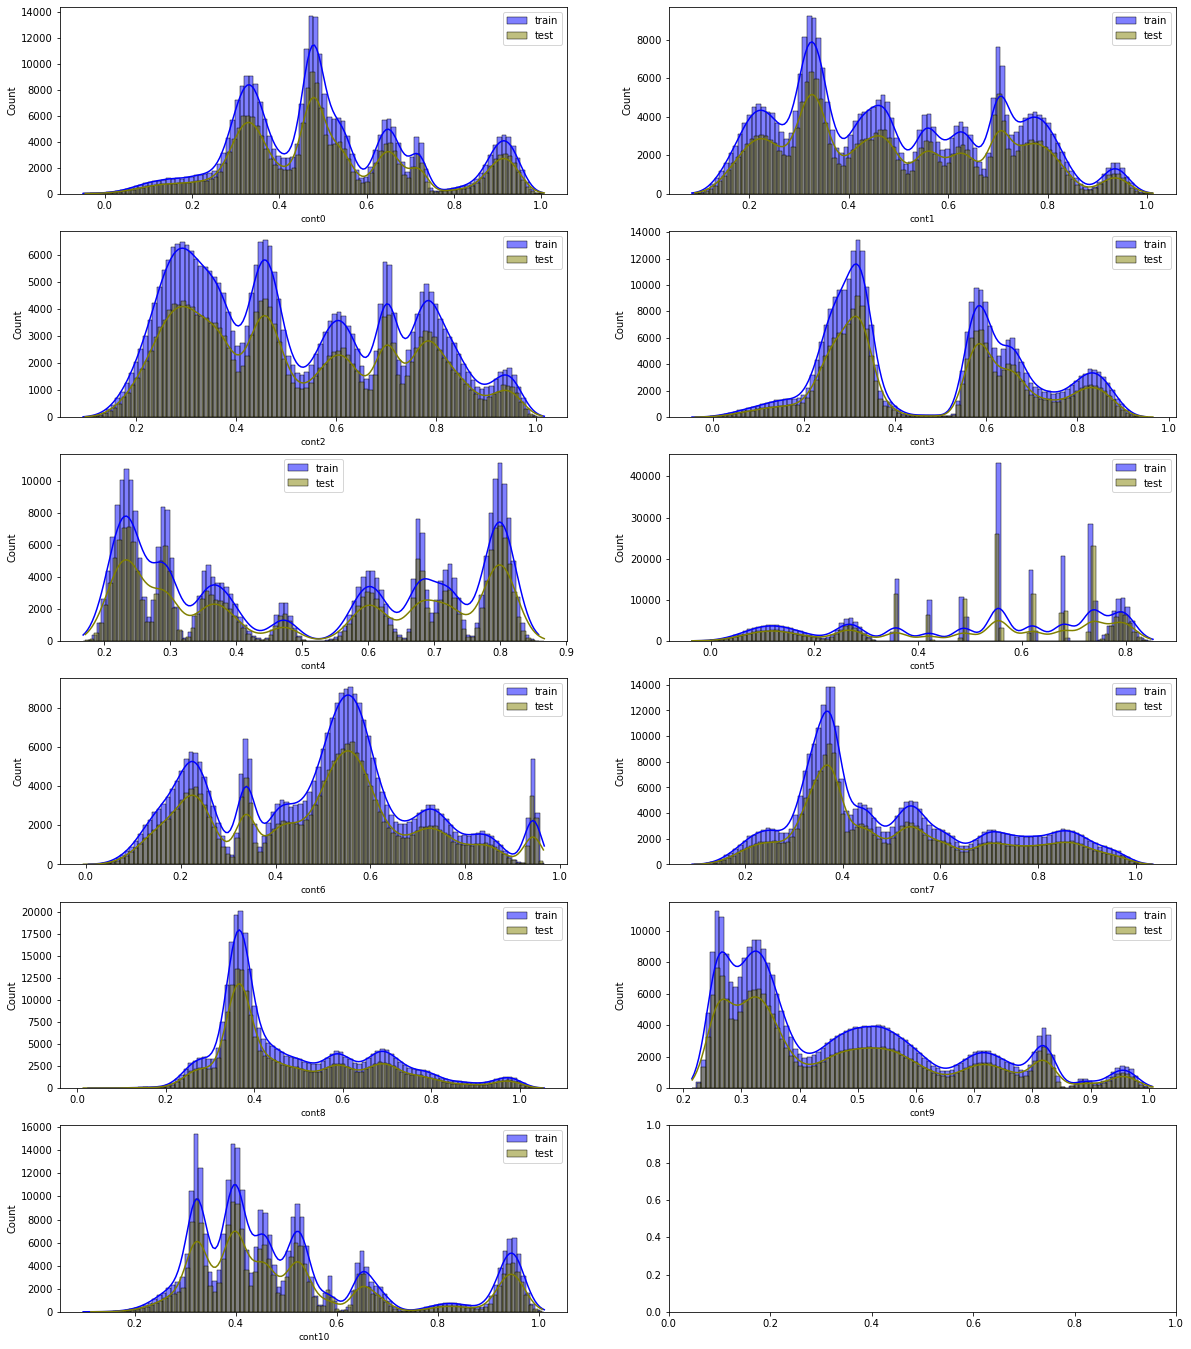

In [72]:
# Numerical features distribution (thanks to @hamzaghanmi for this cell)


i = 1
plt.figure()
fig, ax = plt.subplots(6, 2,figsize=(20, 24))
for feature in num_columns:
    plt.subplot(6, 2,i)
    sns.histplot(train[feature],color="blue", kde=True,bins=100, label='train')
    sns.histplot(test[feature],color="olive", kde=True,bins=100, label='test')
    plt.xlabel(feature, fontsize=9); plt.legend()
    i += 1
plt.show()



### Correlation Map

In [77]:
corr = train[num_columns+['target']].corr()
corr.style.background_gradient(cmap='viridis').set_precision(2)

,cont0,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,target
cont0,1.00,0.47,0.49,0.55,0.16,-0.17,-0.44,0.74,0.37,0.41,0.81,-0.02
cont1,0.47,1.00,0.86,0.26,0.13,0.19,0.12,0.58,0.67,0.39,0.47,0.16
cont2,0.49,0.86,1.00,0.29,0.16,0.16,0.07,0.61,0.66,0.40,0.51,0.14
cont3,0.55,0.26,0.29,1.00,0.22,-0.07,-0.43,0.64,0.19,0.38,0.61,-0.15
cont4,0.16,0.13,0.16,0.22,1.00,0.04,-0.08,0.23,0.06,0.16,0.21,-0.08
cont5,-0.17,0.19,0.16,-0.07,0.04,1.00,0.44,-0.09,0.14,0.12,-0.16,0.22
cont6,-0.44,0.12,0.07,-0.43,-0.08,0.44,1.00,-0.36,0.12,-0.13,-0.44,0.19
cont7,0.74,0.58,0.61,0.64,0.23,-0.09,-0.36,1.00,0.48,0.44,0.78,-0.04
cont8,0.37,0.67,0.66,0.19,0.06,0.14,0.12,0.48,1.00,0.29,0.38,0.18
cont9,0.41,0.39,0.40,0.38,0.16,0.12,-0.13,0.44,0.29,1.00,0.45,0.06
